**<font size=5>
淘宝乐高销售数据分析及可视化
</font>**

**【项目背景】**

老板想在店铺引入乐高销售，因此需要做一些前期调研工作：
- 定价策略
- 哪些地区的用户对乐高喜爱程度更高
- 哪些款式的玩具更受大家喜爱
- 商品应该用什么标签才能吸引更多的用户

首先分析一下淘宝上售卖乐高玩具的商家总体销售情况，再针对销量最好的店铺做重点研究，分析他们的定价以及宣传策略，最后把结果用可视化效果图呈现出来，匹配合理化建议。

<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1-淘宝乐高销售商品数据分析及可视化" data-toc-modified-id="1-淘宝乐高销售商品数据分析及可视化-0">1 淘宝乐高销售商品数据分析及可视化</a></span><ul class="toc-item"><li><span><a href="#1.1-数据读入" data-toc-modified-id="1.1-数据读入-0.1">1.1 数据读入</a></span></li><li><span><a href="#1.2-数据预处理" data-toc-modified-id="1.2-数据预处理-0.2">1.2 数据预处理</a></span></li><li><span><a href="#1.3-数据可视化" data-toc-modified-id="1.3-数据可视化-0.3">1.3 数据可视化</a></span><ul class="toc-item"><li><span><a href="#1.3.1-销量top10店铺柱形图" data-toc-modified-id="1.3.1-销量top10店铺柱形图-0.3.1">1.3.1 销量top10店铺柱形图</a></span></li><li><span><a href="#1.3.2-产地top10店铺柱形图" data-toc-modified-id="1.3.2-产地top10店铺柱形图-0.3.2">1.3.2 产地top10店铺柱形图</a></span></li><li><span><a href="#1.3.3-国内各产地销量分布图" data-toc-modified-id="1.3.3-国内各产地销量分布图-0.3.3">1.3.3 国内各产地销量分布图</a></span></li><li><span><a href="#1.3.4-不同价格区间的商品数量分布柱形图" data-toc-modified-id="1.3.4-不同价格区间的商品数量分布柱形图-0.3.4">1.3.4 不同价格区间的商品数量分布柱形图</a></span></li><li><span><a href="#1.3.5-不同价格区间销售额整体表现饼图" data-toc-modified-id="1.3.5-不同价格区间销售额整体表现饼图-0.3.5">1.3.5 不同价格区间销售额整体表现饼图</a></span></li><li><span><a href="#1.3.6-商品标题词云图" data-toc-modified-id="1.3.6-商品标题词云图-0.3.6">1.3.6 商品标题词云图</a></span></li></ul></li></ul></li><li><span><a href="#2-天猫旗舰店数据分析及可视化" data-toc-modified-id="2-天猫旗舰店数据分析及可视化-1">2 天猫旗舰店数据分析及可视化</a></span><ul class="toc-item"><li><span><a href="#2.1-数据读入" data-toc-modified-id="2.1-数据读入-1.1">2.1 数据读入</a></span></li><li><span><a href="#2.2-数据预处理" data-toc-modified-id="2.2-数据预处理-1.2">2.2 数据预处理</a></span></li><li><span><a href="#2.3-数据可视化" data-toc-modified-id="2.3-数据可视化-1.3">2.3 数据可视化</a></span><ul class="toc-item"><li><span><a href="#2.3.1-乐高旗舰店月销量排名top10商品柱形图" data-toc-modified-id="2.3.1-乐高旗舰店月销量排名top10商品柱形图-1.3.1">2.3.1 乐高旗舰店月销量排名top10商品柱形图</a></span></li><li><span><a href="#2.3.2-不同价格区间商品数量分布柱形图" data-toc-modified-id="2.3.2-不同价格区间商品数量分布柱形图-1.3.2">2.3.2 不同价格区间商品数量分布柱形图</a></span></li><li><span><a href="#2.3.3-不同价格区间销售额表现饼图" data-toc-modified-id="2.3.3-不同价格区间销售额表现饼图-1.3.3">2.3.3 不同价格区间销售额表现饼图</a></span></li></ul></li></ul></li></ul></div>

# 1 淘宝乐高销售商品数据分析及可视化

In [1]:
import numpy as np
import pandas as pd
import time
import jieba

from pyecharts.charts import Bar, Line, Pie, Map, Page, Grid
from pyecharts import options as opts
from pyecharts.globals import SymbolType

## 1.1 数据读入

In [2]:
df_tb = pd.read_excel('./数据/乐高淘宝数据.xlsx')
df_tb.head()

,商品名称,店铺名称,价格,付款人数,产地
0,乐高旗舰店官网悟空小侠系列80012孙悟,乐高官方旗舰店,1299.0,['867人付款'],浙江 嘉兴
1,LEGO乐高 71043收藏版哈利波特霍格沃兹城堡玩具礼物,天猫国际进口超市,3299.0,['259人付款'],浙江 杭州
2,LEGO乐高机械组布加迪42083粉丝收藏旗舰款玩具模型礼物,天猫国际进口超市,2799.0,['441人付款'],浙江 杭州
3,乐高旗舰店官网3月新品76895超级赛车系列法拉利赛车积木玩具男孩,乐高官方旗舰店,199.0,['358人付款'],浙江 嘉兴
4,乐高旗舰店官网3月新品得宝系列10921超级英雄实验室大颗粒益智,乐高官方旗舰店,299.0,['126人付款'],浙江 嘉兴


数据包括五个字段：
- 商品名称
- 店铺名称
- 价格
- 付款人数
- 产地

info()方法获取到了各个数据非空的数量，以及它们的数据类型：

In [3]:
df_tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4404 entries, 0 to 4403
Data columns (total 5 columns):
商品名称    4404 non-null object
店铺名称    4404 non-null object
价格      4404 non-null float64
付款人数    4404 non-null object
产地      4404 non-null object
dtypes: float64(1), object(4)
memory usage: 172.1+ KB


可以看到商品名称、店铺名称、价格、付款人数及产地这五个字段都对应有4044个非空的数据。

## 1.2 数据预处理

1. 删除重复值
2. 付款人数：提取数字
3. 计算销售额：销售额 = 价格 × 付款人数
4. 产地：提取省份

现有的数据中可能存在一些重复值，会影响后续统计的结果，在预处理阶段需要删除这些重复数。删除“购买人数”一栏为空白的记录，再来查看一下数据摘要。

In [4]:
# 删除重复值
df_tb.drop_duplicates(inplace=True)
# 删除购买人数为空的记录
df_tb = df_tb[df_tb['付款人数'].str.contains('人付款')]

In [5]:
# 重置索引
df_tb = df_tb.reset_index(drop=True)

In [6]:
df_tb.head()

,商品名称,店铺名称,价格,付款人数,产地
0,乐高旗舰店官网悟空小侠系列80012孙悟,乐高官方旗舰店,1299.0,['867人付款'],浙江 嘉兴
1,LEGO乐高 71043收藏版哈利波特霍格沃兹城堡玩具礼物,天猫国际进口超市,3299.0,['259人付款'],浙江 杭州
2,LEGO乐高机械组布加迪42083粉丝收藏旗舰款玩具模型礼物,天猫国际进口超市,2799.0,['441人付款'],浙江 杭州
3,乐高旗舰店官网3月新品76895超级赛车系列法拉利赛车积木玩具男孩,乐高官方旗舰店,199.0,['358人付款'],浙江 嘉兴
4,乐高旗舰店官网3月新品得宝系列10921超级英雄实验室大颗粒益智,乐高官方旗舰店,299.0,['126人付款'],浙江 嘉兴


In [7]:
df_tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3411 entries, 0 to 3410
Data columns (total 5 columns):
商品名称    3411 non-null object
店铺名称    3411 non-null object
价格      3411 non-null float64
付款人数    3411 non-null object
产地      3411 non-null object
dtypes: float64(1), object(4)
memory usage: 133.3+ KB


经过去重删除，现在的有效数据是3411条。

“付款人数”这一列数据是数字文字相结合的形式，在后续分析中我们只需使用具体的数字。下面提取“付款人数”这列的数字信息。

In [8]:
# purchase_num处理
df_tb['付款人数'] = df_tb['付款人数'].str.extract('(\d+)').astype('int')
df_tb.head()

,商品名称,店铺名称,价格,付款人数,产地
0,乐高旗舰店官网悟空小侠系列80012孙悟,乐高官方旗舰店,1299.0,867,浙江 嘉兴
1,LEGO乐高 71043收藏版哈利波特霍格沃兹城堡玩具礼物,天猫国际进口超市,3299.0,259,浙江 杭州
2,LEGO乐高机械组布加迪42083粉丝收藏旗舰款玩具模型礼物,天猫国际进口超市,2799.0,441,浙江 杭州
3,乐高旗舰店官网3月新品76895超级赛车系列法拉利赛车积木玩具男孩,乐高官方旗舰店,199.0,358,浙江 嘉兴
4,乐高旗舰店官网3月新品得宝系列10921超级英雄实验室大颗粒益智,乐高官方旗舰店,299.0,126,浙江 嘉兴


前面整合了“付款人数”的数据，现在可以很容易地计算出每种商品的销售额，新插入一列“销售额”，计算价格 × 付款人数可得。

In [9]:
# 计算销售额
df_tb['销售额'] = df_tb['价格'] * df_tb['付款人数']

下一步用空格分割“产地”这一列的信息，把省份提取出来，生成新的一列。

In [10]:
# 提取省份信息
df_tb['省份'] = df_tb['产地'].str.split(' ').str[0]

In [11]:
df_tb.head()

,商品名称,店铺名称,价格,付款人数,产地,销售额,省份
0,乐高旗舰店官网悟空小侠系列80012孙悟,乐高官方旗舰店,1299.0,867,浙江 嘉兴,1126233.0,浙江
1,LEGO乐高 71043收藏版哈利波特霍格沃兹城堡玩具礼物,天猫国际进口超市,3299.0,259,浙江 杭州,854441.0,浙江
2,LEGO乐高机械组布加迪42083粉丝收藏旗舰款玩具模型礼物,天猫国际进口超市,2799.0,441,浙江 杭州,1234359.0,浙江
3,乐高旗舰店官网3月新品76895超级赛车系列法拉利赛车积木玩具男孩,乐高官方旗舰店,199.0,358,浙江 嘉兴,71242.0,浙江
4,乐高旗舰店官网3月新品得宝系列10921超级英雄实验室大颗粒益智,乐高官方旗舰店,299.0,126,浙江 嘉兴,37674.0,浙江


## 1.3 数据可视化

1. 乐高销量排名top10店铺 - 条形图
2. 乐高产地数量排名top10 - 条形图
3. 乐高产地国内销量分布 - 地图
4. 价格分布 - 饼图
5. 不同价格区间的销量表现 - 饼图
6. 商品标题词云图 - 词云图

### 1.3.1 销量top10店铺柱形图

根据店铺名称分组，再把相对应的付款人数的数字相加，就可以得到每个店铺的销量，最后从高到低排列。

In [12]:
# 销量top10淘宝店铺
shop_top10 = df_tb.groupby('店铺名称')['付款人数'].sum().sort_values(ascending=False).head(10)
shop_top10

店铺名称
乐高官方旗舰店                28669
天猫超市                    7122
t_1480604179663zhou     7076
themusicman             7000
童趣互娱                    6722
草莓牛奶加冰                  6500
h543515750              5915
liji0904                4919
贝妮欧                     4175
konglone                3831
Name: 付款人数, dtype: int32

In [13]:
# 柱形图
bar1 = Bar(init_opts=opts.InitOpts(width='900px', height='500px'))
bar1.add_xaxis(shop_top10.index.tolist())
bar1.add_yaxis('', shop_top10.values.tolist())
bar1.set_global_opts(title_opts=opts.TitleOpts(pos_left='center', title='淘宝乐高销量排名top10店铺'),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-15)),
                     visualmap_opts=opts.VisualMapOpts(max_=28669)
                     )
bar1.render('淘宝乐高销量排名top10店铺柱形图.html')

C:\ProgramData\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'C:\\Users\\陈方舟\\Desktop\\Python\\小象学院\\7个课程内项目资料包\\数据分析\\解读乐高\\淘宝乐高销量排名top10店铺柱形图.html'

![](淘宝乐高销量排名top10店铺柱形图.png)

乐高官方旗舰店的销量稳居第一，接下来的第二名是天猫超市。第二名往后的各家销量差距不大，官方旗舰店拥有绝对的销量优势。

### 1.3.2 产地top10店铺柱形图

In [14]:
# 产地top10
province_top10 = df_tb.省份.value_counts()[:10]
province_top10

广东    1000
上海     960
北京     662
浙江     249
江苏     144
辽宁     116
天津     113
湖北      63
山东      33
美国      29
Name: 省份, dtype: int64

In [15]:
# 柱形图
bar2 = Bar(init_opts=opts.InitOpts(width='900px', height='500px'))
bar2.add_xaxis(province_top10.index.tolist())
bar2.add_yaxis('', province_top10.values.tolist())
bar2.set_global_opts(title_opts=opts.TitleOpts(pos_left='center', title='淘宝乐高产地数量排名top10'),
                     visualmap_opts=opts.VisualMapOpts(max_=1000))
bar2.render('淘宝乐高产地数量排名top10柱形图.html')

C:\ProgramData\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'C:\\Users\\陈方舟\\Desktop\\Python\\小象学院\\7个课程内项目资料包\\数据分析\\解读乐高\\淘宝乐高产地数量排名top10柱形图.html'

![](淘宝乐高产地数量排名top10柱形图.png)

### 1.3.3 国内各产地销量分布图

在数据中已经有了产地“省份”和“付款人数”，先把数据按照省份分组，再计算总的付款人数，就可以得到各个省份乐高的销量情况。

In [16]:
# 各省乐高销量分布
province_num = df_tb.groupby('省份')['付款人数'].sum().sort_values(ascending=False)
province_num[:5]

省份
广东    172277
上海     49649
浙江     42537
北京     18003
江苏      5309
Name: 付款人数, dtype: int32

针对这种地区类型的统计结果，我们可以将它呈现在地图上，以颜色的深浅程度来区分不同地区的数据状况。

In [17]:
# 地图
map1 = Map(init_opts=opts.InitOpts(width='900px', height='500px'))
map1.add("", [list(z) for z in zip(province_num.index.tolist(), province_num.values.tolist())],
         maptype='china')
map1.set_global_opts(title_opts=opts.TitleOpts(pos_left='center', title='淘宝国内各产地乐高销量分布'),
                     visualmap_opts=opts.VisualMapOpts(max_=172277), )
map1.render('淘宝国内各产地乐高销量分布图.html')

C:\ProgramData\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'C:\\Users\\陈方舟\\Desktop\\Python\\小象学院\\7个课程内项目资料包\\数据分析\\解读乐高\\淘宝国内各产地乐高销量分布图.html'

![](淘宝国内各产地乐高销量分布图.png)

### 1.3.4 不同价格区间的商品数量分布柱形图

根据“价格”这一列的数据，我们划分7个区间，统计每个区间的商品数量。

In [18]:
# 分箱
cut_bins = [0, 50, 100, 200, 300, 500, 1000, 8888]
cut_labels = ['0~50元', '50~100元', '100~200元', '200~300元', '300~500元', '500~1000元', '1000元以上']

price_cut = pd.cut(df_tb['价格'], bins=cut_bins, labels=cut_labels)
price_num = price_cut.value_counts()
price_num

0~50元        895
100~200元     701
50~100元      486
500~1000元    411
300~500元     370
200~300元     288
1000元以上      260
Name: 价格, dtype: int64

In [19]:
bar3 = Bar(init_opts=opts.InitOpts(width='900px', height='500px'))
bar3.add_xaxis(['0~50元', '50~100元', '100~200元', '200~300元', '300~500元', '500~1000元', '1000元以上'])
bar3.add_yaxis('', [895, 486, 701, 288, 370, 411, 260])
bar3.set_global_opts(title_opts=opts.TitleOpts(pos_left='center', title='淘宝不同价格区间的商品数量分布'),
                     visualmap_opts=opts.VisualMapOpts(max_=900))
bar3.render('淘宝不同价格区间的商品数量分布柱形图.html')

C:\ProgramData\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'C:\\Users\\陈方舟\\Desktop\\Python\\小象学院\\7个课程内项目资料包\\数据分析\\解读乐高\\淘宝不同价格区间的商品数量分布柱形图.html'

![](淘宝不同价格区间的商品数量分布柱形图.png)

0-50元之间的乐高售出数量最多，一共895件，其次是100-200价格区间共701件，1000元以上售出的数量最少，共计260件。

### 1.3.5 不同价格区间销售额整体表现饼图

看到了销量与价格区间的关系，我们再统计一下不同价格区间的销售额表现情况。

添加一个“价格标签”字段，给每行数据新增一个价格标签的内容，根据价格划分为“0-50元”、“50-100元”等七个标签。再根据“价格标签”分组，统计加和得到销售额。

In [20]:
# 添加列
df_tb['价格标签'] = price_cut
cut_purchase = df_tb.groupby('价格标签')['销售额'].sum()
cut_purchase

价格标签
0~50元         3276343.91
50~100元       4254628.19
100~200元      9163543.91
200~300元      4562817.64
300~500元      8885389.32
500~1000元     9250876.30
1000元以上      18742166.89
Name: 销售额, dtype: float64

绘制饼图可以清晰地看出各价格区间货品销售额在总体占比情况。

In [21]:
data_pair = [list(z) for z in zip(cut_purchase.index.tolist(), cut_purchase.values.tolist())]

# 绘制饼图
pie1 = Pie(init_opts=opts.InitOpts(width='900px', height='500px'))
pie1.add('', data_pair, radius=['35%', '60%'])
pie1.set_global_opts(title_opts=opts.TitleOpts(pos_left='center', title='淘宝不同价格区间的销售额整体表现'),
                     legend_opts=opts.LegendOpts(orient='vertical', pos_top='15%', pos_left='2%'))
pie1.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}:{d}%"))
pie1.set_colors(['#EF9050', '#3B7BA9', '#6FB27C', '#FFAF34', '#D8BFD8', '#00BFFF', '#7FFFAA'])
pie1.render('淘宝不同价格区间的销售额整体表现饼图.html')

C:\ProgramData\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'C:\\Users\\陈方舟\\Desktop\\Python\\小象学院\\7个课程内项目资料包\\数据分析\\解读乐高\\淘宝不同价格区间的销售额整体表现饼图.html'

![](淘宝不同价格区间的销售额整体表现饼图.png)

销售额中占比最高的居然是销量最低的“1000元以上”价格分区的乐高玩具，占据销售额的32.24%。其次是500-1000区间占比为15.91%。100-200元玩具排名第三，占总销售额的15.76%。销量最高的0-50区间反而在销售额中占比最低，仅为5.64%。

为了方便，我们把所有的可视化效果放在同一页面进行展示。

In [22]:
# 生成page
page1 = Page()
page1.add(bar1, bar2, map1, bar3, pie1)
page1.render('淘宝乐高销售商品数据分析可视化.html')

'C:\\Users\\陈方舟\\Desktop\\Python\\小象学院\\7个课程内项目资料包\\数据分析\\解读乐高\\淘宝乐高销售商品数据分析可视化.html'

### 1.3.6 商品标题词云图

In [23]:
def get_cut_words(content_series):
    # 读入停用词表
    stop_words = []

    with open(r"stop_words.txt", 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            stop_words.append(line.strip())

    # 添加关键词
    my_words = ['乐高', '悟空小侠', '大颗粒', '小颗粒']
    for i in my_words:
        jieba.add_word(i)

    # 分词
    word_num = jieba.lcut(content_series.str.cat(sep='。'), cut_all=False)

    # 条件筛选
    word_num_selected = [i for i in word_num if i not in stop_words and len(i) >= 2]

    return word_num_selected

In [24]:
text = get_cut_words(content_series=df_tb['商品名称'])
text[:5]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\陈方舟\AppData\Local\Temp\jieba.cache
Loading model cost 1.010 seconds.
Prefix dict has been built successfully.


['乐高', '旗舰店', '官网', '悟空小侠', '系列']

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:35: ResourceWarning: unclosed file <_io.TextIOWrapper name='C:\\ProgramData\\Anaconda3\\lib\\site-packages\\wordcloud\\stopwords' mode='r' encoding='cp936'>
  STOPWORDS = set(map(str.strip, open(os.path.join(FILE, 'stopwords')).readlines()))


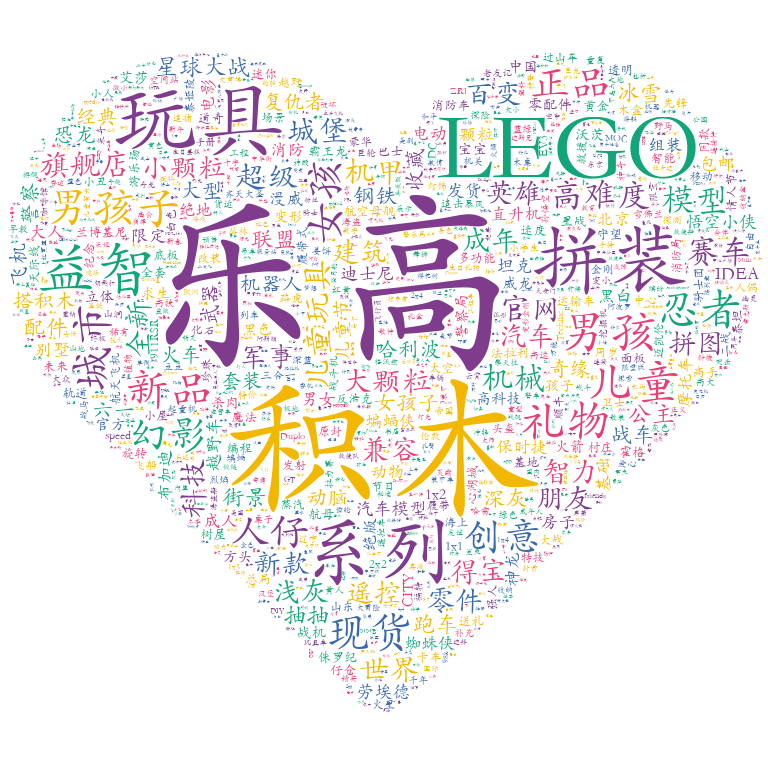

In [25]:
import stylecloud
from IPython.display import Image  # 用于在jupyter lab中显示本地图片

# 绘制词云图
stylecloud.gen_stylecloud(text=' '.join(text),
                          collocations=False,
                          font_path='STKAITI.TTF',
                          icon_name='fas fa-heart',
                          size=768,
                          output_name='淘宝乐高商品标题词云图.png')
Image(filename='淘宝乐高商品标题词云图.png')

关键词“积木”、“玩具”、“拼装”、“送礼”、“新品”、“益智”等在商品描述中出现的频率最高。

# 2 天猫旗舰店数据分析及可视化

## 2.1 数据读入

In [26]:
# 读入数据
df_tm = pd.read_excel('./数据/天猫乐高旗舰店数据.xlsx')
df_tm.head()

,名称,适用年龄,价格,销量,评论数,备注型号
0,乐高哈利波特系列霍格沃茨城堡71043成人收藏,适用年龄范围：16+岁,3999.00,139,511,71043 霍格沃兹城堡
1,乐高旗舰店Ideas系列21319中央咖啡厅老友记收藏送礼,适用年龄16岁+,699.00,454,1299,无
2,乐高旗舰店官网2020年新品10269 哈雷戴维森®肥仔®摩托车成人收藏,NaN,999.00,276,509,无
3,乐高旗舰店官网2020年新品Ideas系列21320恐龙化石男女孩玩具礼物,NaN,599.00,359,524,无
4,乐高旗舰店官网10874智能蒸汽火车遥控轨道大颗粒益智积木玩具,适用年龄范围：2-5岁,549.00,806,2884,10874蒸汽智能火车


数据包括六个字段：
- 名称
- 适用年龄
- 价格
- 销量
- 评论数
- 备注型号

In [27]:
df_tm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 6 columns):
名称      392 non-null object
适用年龄    334 non-null object
价格      392 non-null object
销量      392 non-null object
评论数     392 non-null int64
备注型号    392 non-null object
dtypes: int64(1), object(5)
memory usage: 18.5+ KB


## 2.2 数据预处理

1. 删除重复值
2. 价格处理/类型转换
3. 销量：类型转换
4. 计算销售额

In [28]:
# 删除重复值
df_tm.drop_duplicates(inplace=True)

In [29]:
# 价格处理
def tranform_price(x):
    if '-' in x:
        return (float(x.split('-')[1]) - float(x.split('-')[0])) / 2
    else:
        return x

# 价格转换
df_tm['价格'] = df_tm.价格.apply(lambda x: tranform_price(x)).astype('float')

# 使用平均值填充缺失值
df_tm['销量'] = df_tm.销量.replace('无', 200)

# 转换类型
df_tm['销量'] = df_tm.销量.astype('int')

In [30]:
df_tm.head()

,名称,适用年龄,价格,销量,评论数,备注型号
0,乐高哈利波特系列霍格沃茨城堡71043成人收藏,适用年龄范围：16+岁,3999.0,139,511,71043 霍格沃兹城堡
1,乐高旗舰店Ideas系列21319中央咖啡厅老友记收藏送礼,适用年龄16岁+,699.0,454,1299,无
2,乐高旗舰店官网2020年新品10269 哈雷戴维森®肥仔®摩托车成人收藏,NaN,999.0,276,509,无
3,乐高旗舰店官网2020年新品Ideas系列21320恐龙化石男女孩玩具礼物,NaN,599.0,359,524,无
4,乐高旗舰店官网10874智能蒸汽火车遥控轨道大颗粒益智积木玩具,适用年龄范围：2-5岁,549.0,806,2884,10874蒸汽智能火车


In [31]:
df_tm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369 entries, 0 to 385
Data columns (total 6 columns):
名称      369 non-null object
适用年龄    317 non-null object
价格      369 non-null float64
销量      369 non-null int32
评论数     369 non-null int64
备注型号    369 non-null object
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 18.7+ KB


方便后续对商品描述的分析，我们去掉商品名称中“乐高旗舰店”、“官网”、“2020年”的描述信息，再新增一列，计算销售额。

In [32]:
# 标题去除-乐高旗舰店和官网
df_tm['名称'] = df_tm.名称.str.replace('乐高旗舰店|官网|2020年', '')

# 销售额
df_tm['销售额'] = df_tm['销量'] * df_tm['价格']

In [33]:
df_tm.head()

,名称,适用年龄,价格,销量,评论数,备注型号,销售额
0,乐高哈利波特系列霍格沃茨城堡71043成人收藏,适用年龄范围：16+岁,3999.0,139,511,71043 霍格沃兹城堡,555861.0
1,Ideas系列21319中央咖啡厅老友记收藏送礼,适用年龄16岁+,699.0,454,1299,无,317346.0
2,新品10269 哈雷戴维森®肥仔®摩托车成人收藏,NaN,999.0,276,509,无,275724.0
3,新品Ideas系列21320恐龙化石男女孩玩具礼物,NaN,599.0,359,524,无,215041.0
4,10874智能蒸汽火车遥控轨道大颗粒益智积木玩具,适用年龄范围：2-5岁,549.0,806,2884,10874蒸汽智能火车,442494.0


## 2.3 数据可视化

接下来我们看看乐高天猫旗舰店的爆款商品以及销售表现和淘宝整体表现是否相同。

### 2.3.1 乐高旗舰店月销量排名top10商品柱形图

In [34]:
# 销量top10商品
rank_top10 = df_tm.sort_values('销量', ascending=False).head(10)[['名称', '销量']]
rank_top10 = rank_top10.sort_values('销量')
rank_top10

,名称,销量
105,好朋友41366奥莉薇亚的草莓蛋糕咖啡店,1117
304,乐高5月新品悟空小侠系列80009猪大厨移动钉耙车,1549
144,10874智能蒸汽火车遥控轨道积木玩具,1565
172,42093雪佛兰科尔维特ZR1跑车积木玩具汽车,1755
128,乐高60215消防局男女孩儿童益智玩具积木送礼,1813
8,城市组太空系列60226火星探测航天飞机积木玩具,1862
103,城市组60226火星探测航天飞机,2424
296,乐高5月新品悟空小侠系列80008悟空小侠云霄战机孙悟空齐天大圣,2453
135,42096保时捷911RSR赛车成人送礼收藏车模,2750
300,悟空小侠系列80012孙悟空齐天大圣黄金机甲,4765


In [35]:
x_data = rank_top10.名称.values.tolist() # x_data = rank_top10['名称'].values.tolist()
y_data = rank_top10.销量.values.tolist() # y_data = rank_top10['销量'].values.tolist()

In [36]:
def grid_base() -> Grid:
    # 柱形图
    bar4 = Bar(init_opts=opts.InitOpts(width='900px', height='500px'))
    bar4.add_xaxis(x_data)
    bar4.add_yaxis('', y_data)
    bar4.reversal_axis()
    bar4.set_global_opts(title_opts=opts.TitleOpts(pos_left='center', title='乐高旗舰店月销量排名top10商品'),
                         yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-15, font_size=10))
                        )
    bar4.set_series_opts(label_opts=opts.LabelOpts(position='right', color='black'))

    grid = Grid()
    grid.add(bar4, grid_opts=opts.GridOpts(pos_left="35%",pos_right="10%"))
    
    return grid
    
grid_base().render('乐高旗舰店月销量排名top10商品条形图.html')

C:\ProgramData\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
C:\ProgramData\Anaconda3\lib\site-packages\pyecharts\charts\composite_charts\grid.py:17: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'C:\\Users\\陈方舟\\Desktop\\Python\\小象学院\\7个课程内项目资料包\\数据分析\\解读乐高\\乐高旗舰店月销量排名top10商品条形图.html'

![](乐高旗舰店月销量排名top10商品条形图.png)

孙悟空齐天大圣黄金机甲这款，以月销量4765件位居榜首。第二位是R赛车成人送礼收藏车模，月销量2750件。云霄战机孙悟空齐天大圣位居第三，月销量达到2453件。

### 2.3.2 不同价格区间商品数量分布柱形图

In [37]:
# 分箱
cut_bins = [0, 200, 400, 600, 800, 1000, 2000, 9469]
cut_labels = ['0~50元', '50~100元', '100~200元', '200~300元', '300~500元', '500~1000元', '1000元以上']

price_cut = pd.cut(df_tb['价格'], bins=cut_bins, labels=cut_labels)
price_num = price_cut.value_counts()
price_num

0~50元        2082
50~100元       495
100~200元      290
200~300元      200
500~1000元     144
1000元以上       116
300~500元       84
Name: 价格, dtype: int64

In [38]:
bar5 = Bar(init_opts=opts.InitOpts(width='900px', height='500px'))
bar5.add_xaxis(['0~50元', '50~100元', '100~200元', '200~300元', '300~500元', '500~1000元', '1000元以上'])
bar5.add_yaxis('', [2082, 495, 290, 200, 84, 144, 116])
bar5.set_global_opts(title_opts=opts.TitleOpts(pos_left='center', title='乐高旗舰店不同价格区间商品数量分布'),
                     visualmap_opts=opts.VisualMapOpts(max_=2000))
bar5.render('乐高旗舰店不同价格区间商品数量分布柱形图.html')

C:\ProgramData\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'C:\\Users\\陈方舟\\Desktop\\Python\\小象学院\\7个课程内项目资料包\\数据分析\\解读乐高\\乐高旗舰店不同价格区间商品数量分布柱形图.html'

![](乐高旗舰店不同价格区间商品数量分布柱形图.png)

数量最多的依然是0-50区间，共2082件商品。最少的是300-500区间，84件商品。

### 2.3.3 不同价格区间销售额表现饼图

先给每行添加新的字段，划分价格区间，再按照价格区间将销售额加和。

In [39]:
# 添加列
df_tm['价格标签'] = price_cut
cut_purchase = df_tm.groupby('价格标签')['销售额'].sum()
cut_purchase

价格标签
0~50元        26510194.0
50~100元       8691541.0
100~200元      5479836.0
200~300元      3428172.0
300~500元      4513350.0
500~1000元     3669553.0
1000元以上       1583335.0
Name: 销售额, dtype: float64

In [40]:
data_pair = [list(z) for z in zip(cut_purchase.index.tolist(), cut_purchase.values.tolist())]

# 绘制饼图
pie2 = Pie(init_opts=opts.InitOpts(width='900px', height='500px'))
pie2.add('', data_pair, radius=['35%', '60%'])
pie2.set_global_opts(title_opts=opts.TitleOpts(pos_left='center', title='乐高旗舰店不同价格区间的销售额整体表现'),
                     legend_opts=opts.LegendOpts(orient='vertical', pos_top='15%', pos_left='2%'))
pie2.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}:{d}%"))
pie2.set_colors(['#EF9050', '#3B7BA9', '#6FB27C', '#FFAF34', '#D8BFD8', '#00BFFF', '#7FFFAA'])
pie2.render('乐高旗舰店不同价格区间的销售额整体表现饼图.html')

C:\ProgramData\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'C:\\Users\\陈方舟\\Desktop\\Python\\小象学院\\7个课程内项目资料包\\数据分析\\解读乐高\\乐高旗舰店不同价格区间的销售额整体表现饼图.html'

![](乐高旗舰店不同价格区间的销售额整体表现饼图.png)

和淘宝全网的数据结果不同，天猫旗舰店0-50元商品占销售额的49.21%，排名第一。1000元以上的乐高玩具在销售额中占比最少，仅为2.94%。这说明大家在购买高价格乐高时，更倾向于寻找其他渠道，而非旗舰店。可能是因为其他店铺的价格相对来说更具优势。

为了方便，我们还是把所有的可视化效果放在同一页面进行展示。

In [41]:
# 生成page
page2 = Page()
page2.add(grid_base(), bar5, pie2)
page2.render('乐高天猫旗舰店数据分析可视化.html')

C:\ProgramData\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
C:\ProgramData\Anaconda3\lib\site-packages\pyecharts\charts\composite_charts\grid.py:17: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'C:\\Users\\陈方舟\\Desktop\\Python\\小象学院\\7个课程内项目资料包\\数据分析\\解读乐高\\乐高天猫旗舰店数据分析可视化.html'

补充